In [1]:
# Three types of feature selection
# 1) Filtering methods by using Statistical Methods like
# a) Chi-Square Test, Anova Test and Pearson Correlation
#2) Wrapper Methods
#a) Forward Selection and b) Backward Elimination
#3) Embedded Method

### Univariate Selection(Filtering Technique)

In [2]:
# Kaggle mobile price classification
import numpy as np
import pandas as pd


In [3]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
dataset=pd.read_csv("archive/train.csv")

In [5]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [9]:
best_features=SelectKBest(score_func=chi2,k=10)

In [10]:
fit=best_features.fit(X,y)

In [13]:
print(fit.scores_)

[1.41298666e+04 7.23232323e-01 6.48365906e-01 6.31010795e-01
 1.01351665e+01 1.52157239e+00 8.98391244e+01 7.45819631e-01
 9.59728626e+01 9.09755558e+00 9.18605355e+00 1.73635695e+04
 9.81058675e+03 9.31267519e+05 9.61487832e+00 1.64803191e+01
 1.32364000e+01 3.27642810e-01 1.92842942e+00 4.22090730e-01]


In [17]:
print(X.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [27]:
dfscores=pd.DataFrame(fit.scores_)

In [28]:
dfscores

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [29]:
dfcolumns=pd.DataFrame(X.columns)

In [30]:
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [33]:
merger=pd.concat([dfcolumns,dfscores],axis=1)

In [35]:
merger.columns=['Features','Scores']

In [36]:
merger

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [40]:
merger=merger.sort_values(by='Scores',ascending=False)

In [41]:
# For selecting the top 10 features
merger.iloc[:10,:]

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


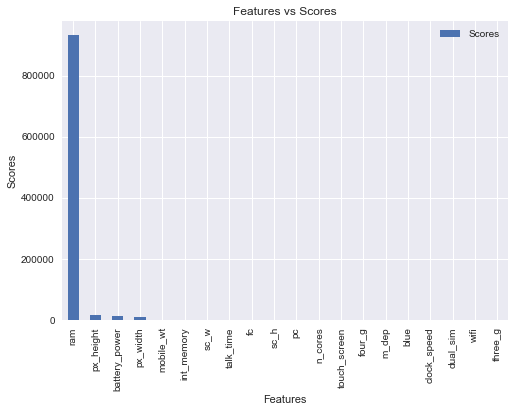

In [72]:
merger.plot(kind='bar',x='Features',y='Scores')
plt.ylabel("Scores")
plt.title("Features vs Scores")
plt.show()

In [79]:
# Ram has the highest weightage, removing ram and top to get better insight
merger1=merger.iloc[4:,:]

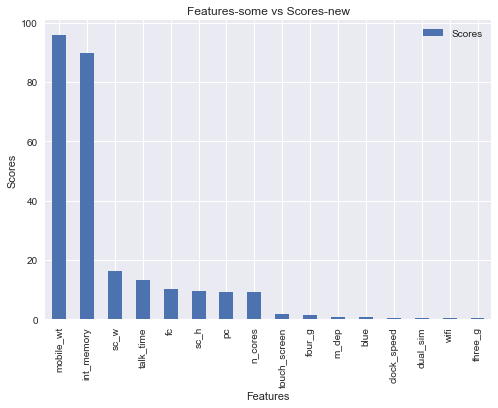

In [80]:
merger1.plot(kind='bar',x='Features',y='Scores')
plt.ylabel("Scores")
plt.title("Features-some vs Scores-new")
plt.show()

### Feature Importance

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model=RandomForestClassifier()

In [84]:
model=model.fit(X,y)

In [87]:
model.feature_importances_

array([0.07718021, 0.00626828, 0.02667903, 0.00696849, 0.02348586,
       0.0061181 , 0.03572064, 0.02512347, 0.03830888, 0.02238871,
       0.02718892, 0.05748713, 0.05621619, 0.48903426, 0.026636  ,
       0.02751656, 0.02917499, 0.00568786, 0.00676427, 0.00605216])

In [88]:
featureImp=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Feature Score'])

In [91]:
featureImp=featureImp.sort_values(by='Feature Score',ascending=False)

In [115]:
featureImp

,Feature Score
ram,0.489034
battery_power,0.077180
px_height,0.057487
px_width,0.056216
mobile_wt,0.038309
int_memory,0.035721
talk_time,0.029175
sc_w,0.027517
pc,0.027189
clock_speed,0.026679


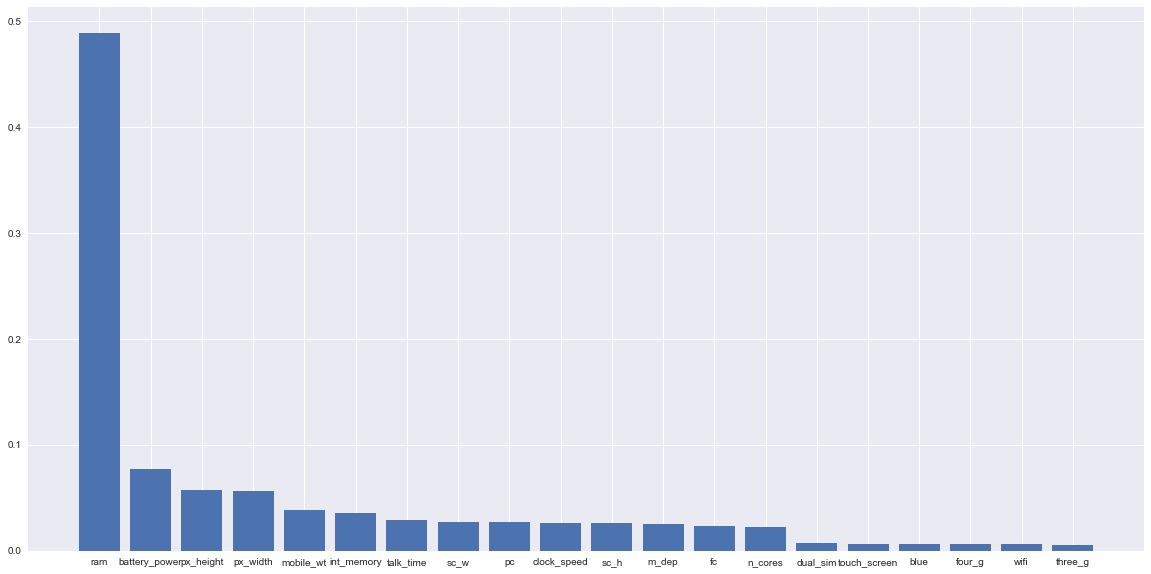

In [94]:
plt.figure(figsize=(20,10))
plt.bar(featureImp.index,featureImp['Feature Score'])
plt.show()

### Correlation Matrix Method

In [97]:
data_corr=dataset.corr()

In [98]:
import seaborn as sns


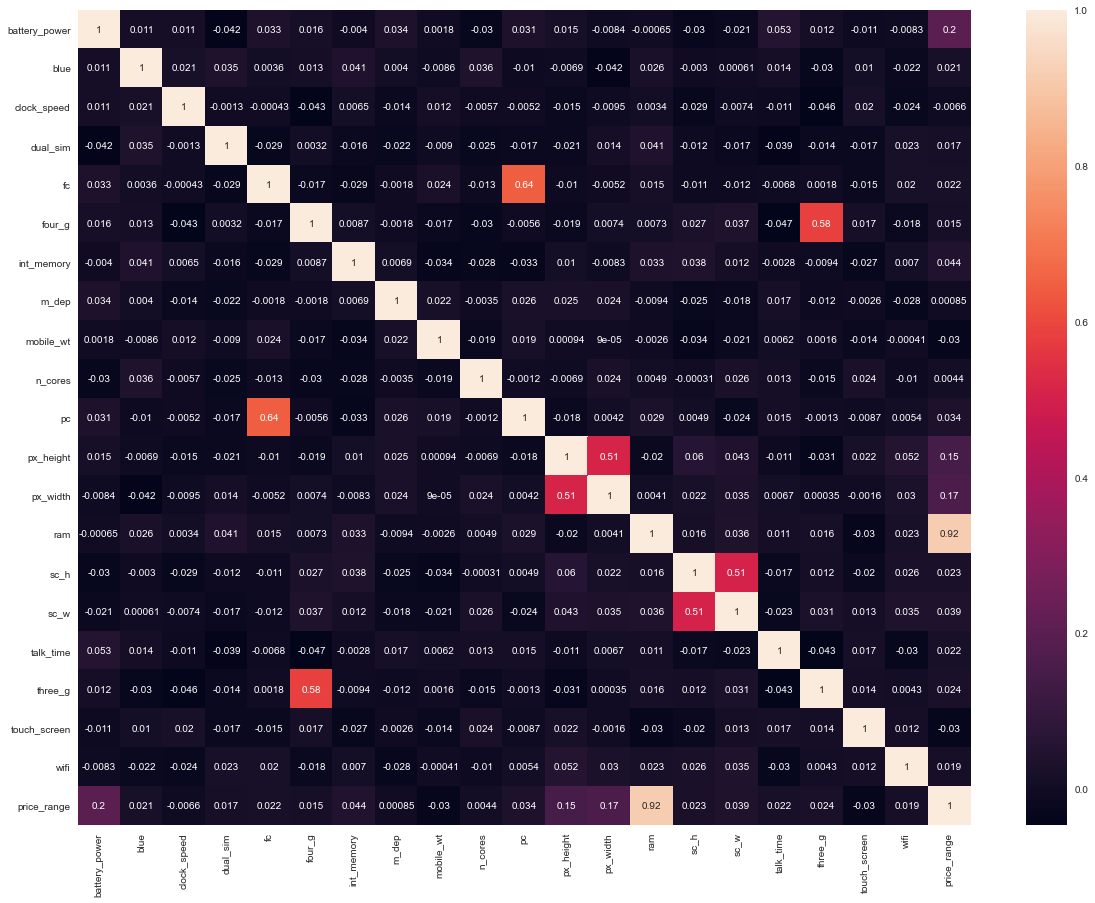

In [100]:
plt.figure(figsize=(20,15))
sns.heatmap(data_corr,annot=True)
plt.show()

### Accuracy

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [103]:
rfc=RandomForestClassifier()

In [106]:
scores=cross_val_score(rfc,X,y,cv=10)

In [108]:
scores.mean()*100

88.55000000000001

In [117]:
featureImp_new=featureImp.head(10)

In [123]:
new_features=featureImp_new.index

In [124]:
X[new_features]

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,talk_time,sc_w,pc,clock_speed
0,2549,842,20,756,188,7,19,7,2,2.2
1,2631,1021,905,1988,136,53,7,3,6,0.5
2,2603,563,1263,1716,145,41,9,2,6,0.5
3,2769,615,1216,1786,131,10,11,8,9,2.5
4,1411,1821,1208,1212,141,44,15,2,14,1.2
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1222,1890,106,2,19,4,14,0.5
1996,2032,1965,915,1965,187,39,16,10,3,2.6
1997,3057,1911,868,1632,108,36,5,1,3,0.9
1998,869,1512,336,670,145,46,19,10,5,0.9


In [125]:
new_scores=cross_val_score(rfc,X[new_features],y,cv=10)

In [126]:
new_scores.mean()*100

89.85000000000001

In [127]:
# Feature selection increased accuracy by 1.5%